In [1]:
import glob
import json
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from metadata.zero_shot_metadata import IMAGENET_CLASSNAMES

In [2]:
wnids = sorted(json.load(open("../metadata/descriptors/descriptors_imagenet_synset.json", "r")).keys())
classnames = IMAGENET_CLASSNAMES

freqs_cc12m = pd.read_csv('../metadata/freqs/class_frequency_cc12m_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_yfcc15m = pd.read_csv('../metadata/freqs/class_frequency_yfcc15m_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_laion400m = pd.read_csv('../metadata/freqs/class_frequency_laion400m_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_laion2b = pd.read_csv('../metadata/freqs/class_frequency_laion2b_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_metaclip_400m = pd.read_csv('../metadata/freqs/class_frequency_metaclip_400m_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_metaclip_fullcc = pd.read_csv('../metadata/freqs/class_frequency_metaclip_fullcc_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()

freq_dict = {'wnid': wnids, 'classname': classnames, 'CC-12M': freqs_cc12m, 'YFCC-15M': freqs_yfcc15m, 'LAION-400M': freqs_laion400m, 'LAION-2B': freqs_laion2b, 'MetaCLIP-400M': freqs_metaclip_400m, 'MetaCLIP-2.5B': freqs_metaclip_fullcc}
freq_df = pd.DataFrame(freq_dict)

/tmp/ipykernel_169500/2124987518.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(ymin=0)


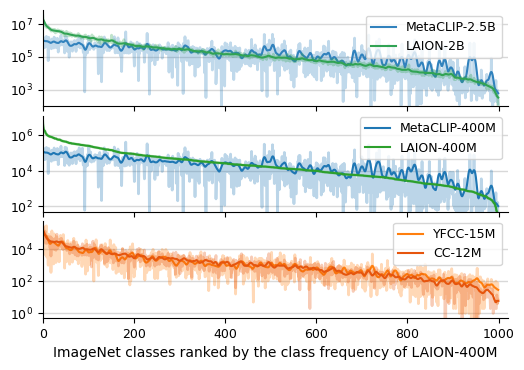

In [16]:
palette = sns.color_palette('tab20')
palette_c = sns.color_palette('tab20c')
palette = [[palette[2], palette_c[4]], [palette[0], palette[4]], [palette_c[0], palette_c[8]]]
hue_order = [['YFCC-15M', 'CC-12M'], ['MetaCLIP-400M', 'LAION-400M'], ['MetaCLIP-2.5B', 'LAION-2B']]
by_key = 'LAION-400M'
ranked_df = freq_df.sort_values(by=[by_key], ascending=False).reset_index()
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(6, 4))
plt.subplots_adjust(wspace=0, hspace=.1)
for i, (datasets, colors) in enumerate(zip(hue_order, palette)):
    i = 2 - i
    for j in range(2):
        dataset, color = datasets[j], colors[j]
        data = ranked_df[dataset].to_numpy()
        ax[i].plot(data, color=color, alpha=.3, linewidth=2)
        filtered = gaussian_filter1d(data, sigma=3)
        ax[i].plot(filtered if dataset != by_key else data, color=color, label=dataset, linewidth=1.5)
    ax[i].set_yscale('log')
    ax[i].legend(loc='upper right', bbox_to_anchor=(1, 1.05 if i > 0 else 1), fontsize=9)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xlim([0, 1020])
    ax[i].yaxis.set_tick_params(labelsize=9, rotation=0)
    ax[i].yaxis.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
    ax[i].xaxis.set_tick_params(labelsize=9, rotation=0)
ax[2].set_ylim(ymin=0)
ax[2].set_yticks([1e0, 1e2, 1e4])
ax[1].set_ylim(ymin=50)
ax[1].set_yticks([1e2, 1e4, 1e6])
ax[0].set_ylim(ymin=100)
ax[0].set_yticks([1e3, 1e5, 1e7])
plt.xlabel('ImageNet classes ranked by the class frequency of {}'.format(by_key), fontsize=10)

plt.savefig('figs/all_freqs.pdf', bbox_inches='tight', dpi=300)
plt.show()

/var/folders/8z/bwhvzd4967b76fpt8fp9q9sr0000gn/T/ipykernel_54646/4092393790.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j,i].set_yticklabels(ticks)
/var/folders/8z/bwhvzd4967b76fpt8fp9q9sr0000gn/T/ipykernel_54646/4092393790.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j,i].set_yticklabels(ticks)
/var/folders/8z/bwhvzd4967b76fpt8fp9q9sr0000gn/T/ipykernel_54646/4092393790.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j,i].set_yticklabels(ticks)
/var/folders/8z/bwhvzd4967b76fpt8fp9q9sr0000gn/T/ipykernel_54646/4092393790.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j,i].set_yticklabels(ticks)
/var/folders/8z/bwhvzd49

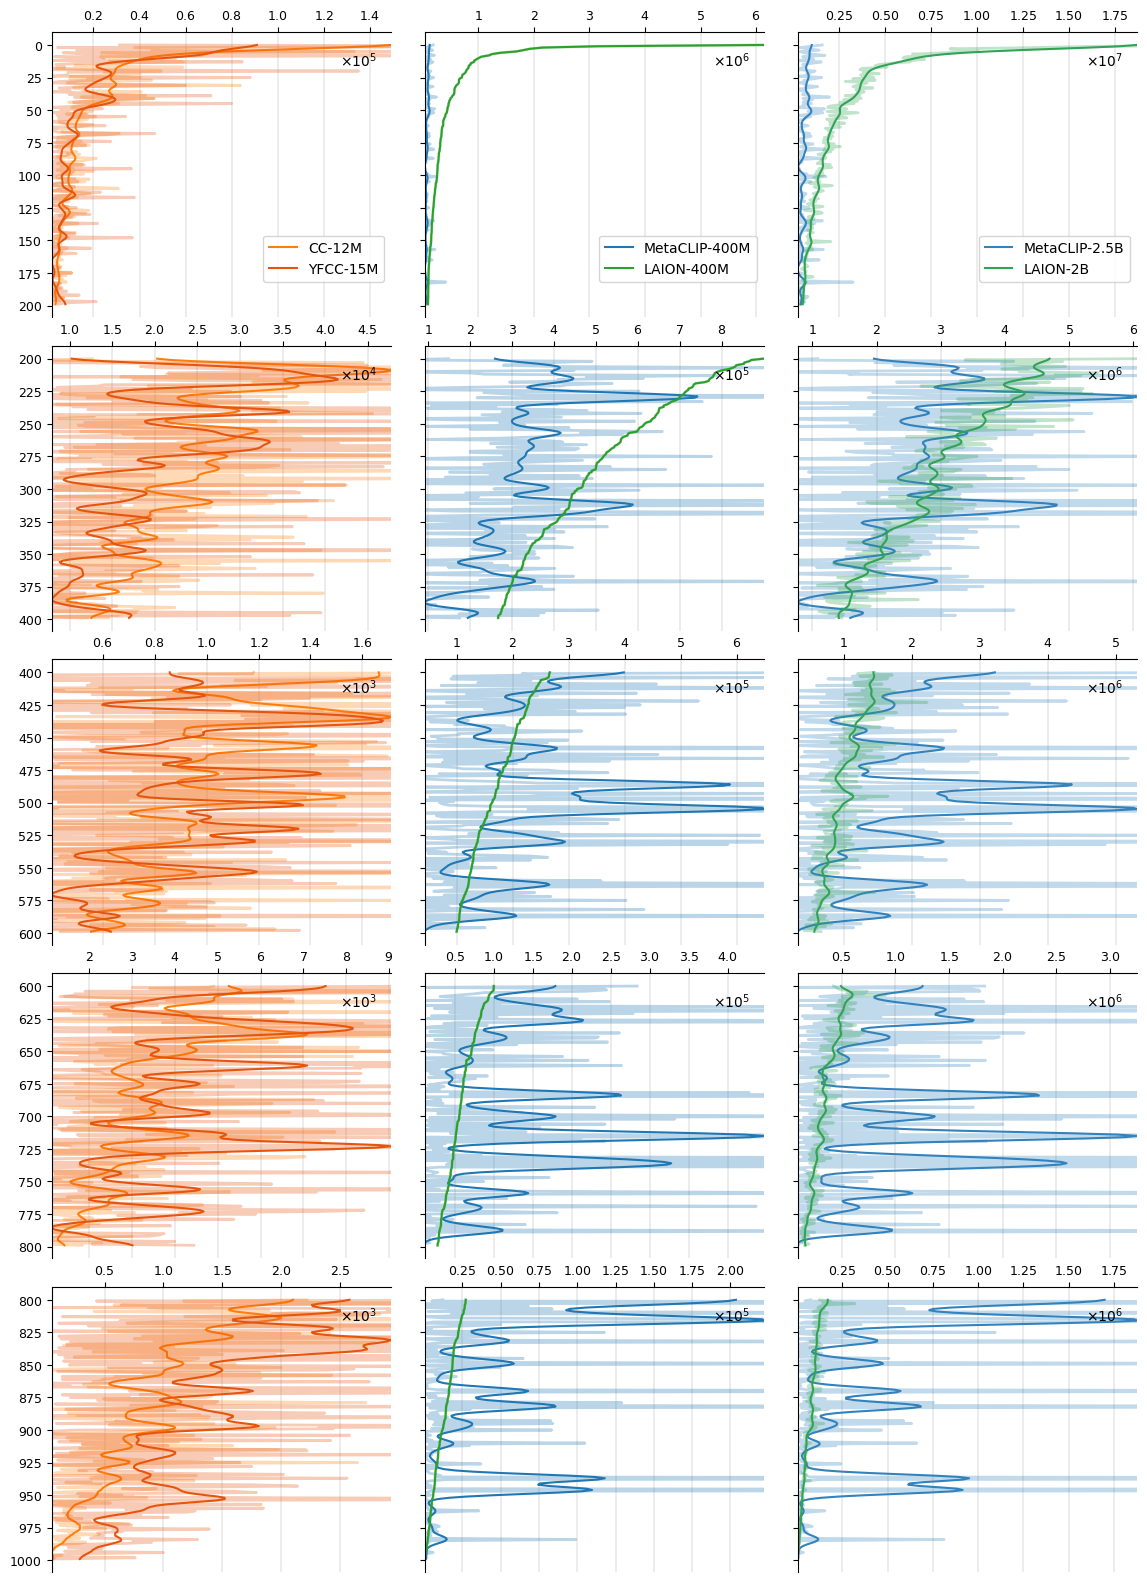

In [4]:
palette = sns.color_palette('tab20')
palette_c = sns.color_palette('tab20c')
palette = [[palette[2], palette_c[4]], [palette[0], palette[4]], [palette_c[0], palette_c[8]]]
hue_order = [['CC-12M', 'YFCC-15M'], ['MetaCLIP-400M', 'LAION-400M'], ['MetaCLIP-2.5B', 'LAION-2B']]
by_key = 'LAION-400M'
ranked_df = freq_df.sort_values(by=[by_key], ascending=False).reset_index()
from matplotlib.ticker import MaxNLocator, ScalarFormatter

fig, ax = plt.subplots(5, 3, sharey='row', figsize=(14, 20))
plt.subplots_adjust(wspace=.1, hspace=.1)
for i, (datasets, colors) in enumerate(zip(hue_order, palette)):
    for j in range(5):
        solid_datas = []
        idxs = np.arange(j*200, (j+1)*200)
        for k in range(2):
            dataset, color = datasets[k], colors[k]
            data = ranked_df[dataset].to_numpy()[j*200:(j+1)*200]
            ax[j, i].plot(data, -idxs, color=color, alpha=.3, linewidth=2)
            filtered = gaussian_filter1d(data, sigma=3)
            solid_data = filtered if dataset != by_key else data
            ax[j, i].plot(solid_data, -idxs, color=color, label=dataset, linewidth=1.5)
            solid_datas.append(solid_data)
        ax[j,i].xaxis.tick_top()
        xfmt = ScalarFormatter(useMathText=True)
        xfmt.set_powerlimits((3, 7))
        ax[j,i].xaxis.set_major_formatter(xfmt)
        ax[j,i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[j,i].get_xaxis().get_offset_text().set_visible(False)
        ax_max = max(ax[j,i].get_xticks())
        exponent_axis = np.floor(np.log10(ax_max)).astype(int)
        ax[j,i].annotate(r'$\times$10$^{%i}$'%(exponent_axis),
             xy=(.85, .88), xycoords='axes fraction')
        ticks = [int(-tick) for tick in ax[j,i].get_yticks()]
        ax[j,i].set_yticklabels(ticks)
        ax[j,i].spines['bottom'].set_visible(False)
        ax[j,i].spines['right'].set_visible(False)
        # set ylim according to solid_datas
        ax[j,i].set_xlim(xmin=min(solid_datas[0].min(), solid_datas[1].min()), xmax=max(solid_datas[0].max(), solid_datas[1].max()))
        # ax[i,j].set_xlim([0, 1020])
        ax[j,i].xaxis.set_tick_params(labelsize=9, rotation=0)
        ax[j,i].xaxis.grid(color='gray', linestyle='-', linewidth=0.3, alpha=0.7)
        ax[j,i].yaxis.set_tick_params(labelsize=9, rotation=0)
    ax[0,i].legend(loc='lower right', bbox_to_anchor=(1, .1), fontsize=10)

plt.savefig('figs/all_freqs_linear.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [4]:
def get_metric(model="ViT-B-32", pretrained="laion400m_e32", root='../exps_clip/logs_pretrained/{}/metrics/metrics_imagenet_zeroshot_val_latest.pt'):
    path = root.format('{}-{}'.format(model, pretrained))
    metrics = torch.load(path, map_location='cpu')
    return {k:v.numpy() for k, v in metrics.items()}

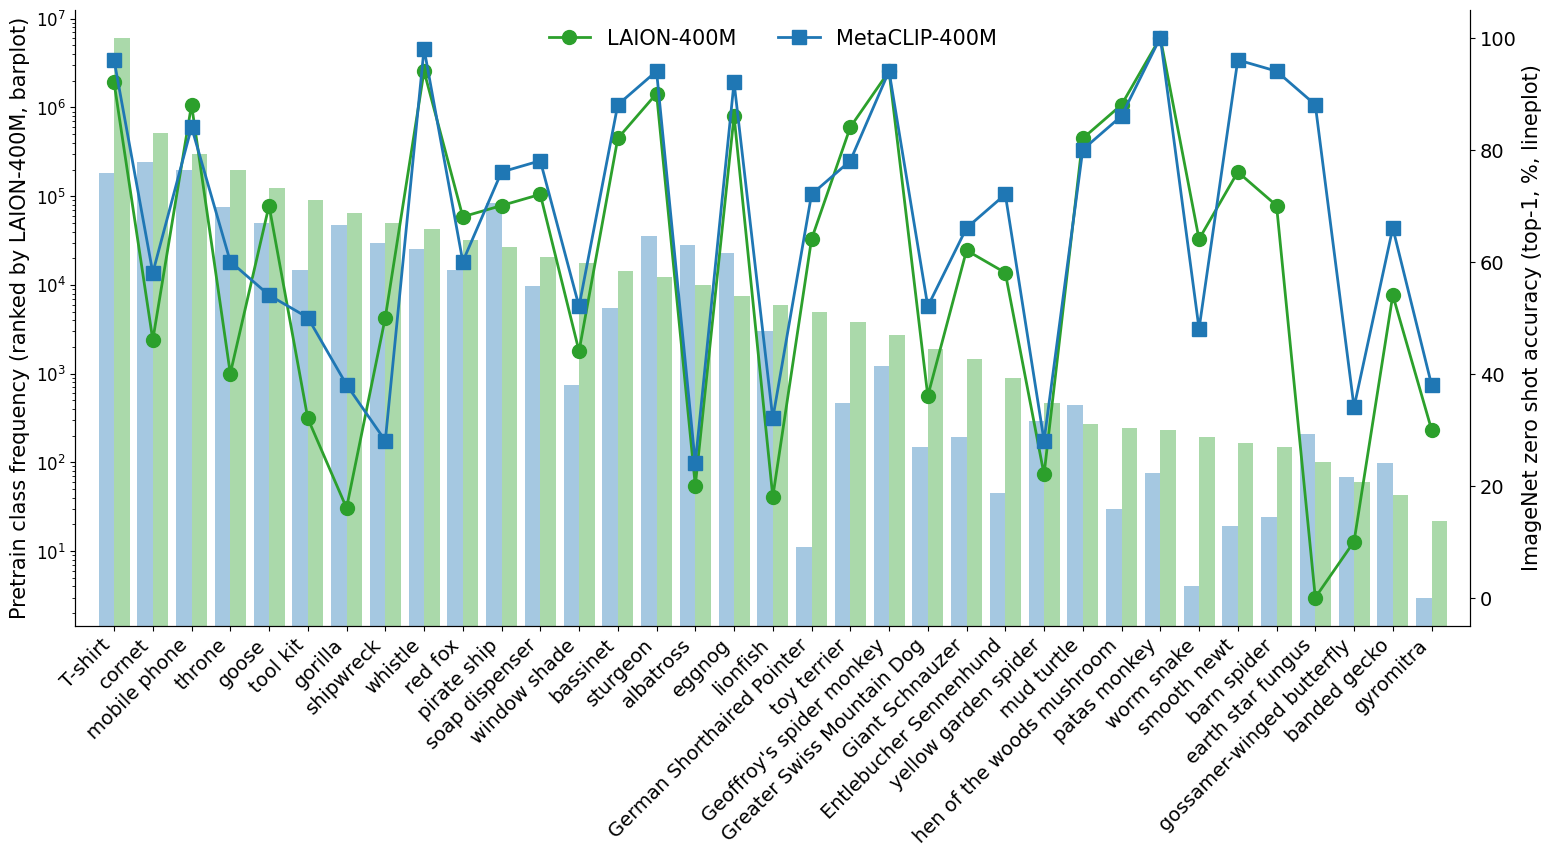

In [13]:
palette = sns.color_palette('tab20')
palette_c = sns.color_palette('tab20c')
palette = [palette[0], palette[4]]
hue_order = ['MetaCLIP-400M', 'LAION-400M']
by_key = 'LAION-400M'

ranked_df = freq_df.sort_values(by=[by_key], ascending=False).reset_index()
nclasses, ntails = 25, 10
idxs = np.arange(0, 1000, 1000 // nclasses)
# idxs_tail = np.arange(1000 - 1, idxs[-1], -(1000 - idxs[-1]) // ntails)
idxs_tail = np.arange(1000 - 1, 1000 - 1 - ntails*2, -2)
idxs = np.concatenate([idxs_tail, idxs[::-1]])
idxs = idxs[::-1]
nclasses += ntails

metrics = [get_metric(model="ViT-B-32", pretrained="metaclip_400m"), get_metric(model="ViT-B-32", pretrained="laion400m_e32")]
metrics = [metric['per_class_accs'][ranked_df.index.to_numpy()]*100 for metric in metrics]

bar_alpha=.4
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
# ax.set_box_aspect(1.5)
ax.bar(np.arange(0, nclasses)-.2, ranked_df[hue_order[0]].to_numpy()[idxs], width=.4, color=palette[0], alpha=bar_alpha)
ax.bar(np.arange(0, nclasses)+.2, ranked_df[hue_order[1]].to_numpy()[idxs], width=.4, color=palette[1], alpha=bar_alpha)
ax.set_ylabel('Pretrain class frequency (ranked by {}, barplot)'.format(by_key), fontsize=15)
ax.yaxis.set_tick_params(labelsize=12, rotation=0)
ax.set_yscale('log')
ax.set_xlim(-1, nclasses)
ax.set_xticks(np.arange(0, nclasses))
ax.set_xticklabels(ranked_df['classname'].to_numpy()[idxs], rotation=45, fontsize=14, ha='right', va='top')

ax2 = ax.twinx()
ax2.plot(np.arange(0, nclasses), metrics[1][idxs], color=palette[1], linewidth=2, marker='o', markersize=10, label=hue_order[1])
ax2.plot(np.arange(0, nclasses), metrics[0][idxs], color=palette[0], linewidth=2, marker='s', markersize=10, label=hue_order[0])
ax2.set_ylabel('ImageNet zero shot accuracy (top-1, %, lineplot)', fontsize=15)
ax2.yaxis.set_tick_params(labelsize=14, rotation=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.legend(loc='upper center', frameon=False, fontsize=15, ncols=2)
plt.savefig('figs_new/example_acc_freq.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [66]:
wnids = sorted(json.load(open("../metadata/descriptors/descriptors_imagenet_synset.json", "r")).keys())
classnames = IMAGENET_CLASSNAMES

freqs_incap = pd.read_csv('../metadata/freqs/class_frequency_incap_imagenet_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()
freqs_laionet = pd.read_csv('../metadata/freqs/class_frequency_laionet_thresh0.7_ori.txt', sep='\t', header=None, names=['class', 'freq'])['freq'].to_numpy()

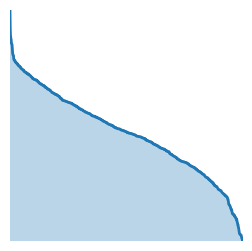

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(np.sort(freqs_incap)[::-1], color='tab:blue', linewidth=2)
ax.fill_between(np.arange(1000), np.sort(freqs_incap)[::-1], cmap='Blues', alpha=.3)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# remove all white margins
ax.margins(0)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.savefig('figs/incaps_distrib.svg', bbox_inches='tight', dpi=300)

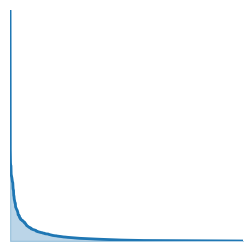

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(np.sort(freqs_laionet)[::-1], color='tab:blue', linewidth=2)
ax.fill_between(np.arange(1000), np.sort(freqs_laionet)[::-1], color='tab:blue', alpha=.3)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.margins(0)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.savefig('figs/laionet_distrib.svg', bbox_inches='tight', dpi=300)

In [5]:
by_key = 'YFCC-15M'

ranked_df = freq_df.sort_values(by=[by_key], ascending=False).reset_index()
idxs_tail = ranked_df[ranked_df[by_key] < 10].index.to_numpy()

metrics = [get_metric(model="RN50", pretrained="cc12m"), get_metric(model="RN50", pretrained="yfcc15m")]
metrics = [metric['per_class_accs'][idxs_tail]*100 for metric in metrics]

In [6]:
ranked_df['YFCC-15M'].loc[idxs_tail].to_numpy()

array([9, 9, 8, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 0])

In [7]:
metrics[1]

array([ 46.,  34.,  44.,  98.,  14.,  10.,  44.,  48.,  42.,  62.,  52.,
        50.,  90.,  88.,  94., 100.,  16.,  12.,  50.,  22.,  74.,  82.,
         0.,  44.,  72.,  22.,   6.,  48.,  20.], dtype=float32)

In [8]:
ranked_df['classname'][-10:]

990                 Pickelhaube
991          Bluetick Coonhound
992    Bouvier des Flandres dog
993      Entlebucher Sennenhund
994                Ibizan Hound
995              potter's wheel
996              Sussex Spaniel
997      Curly-coated Retriever
998                      Kuvasz
999      Dandie Dinmont Terrier
Name: classname, dtype: object